In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

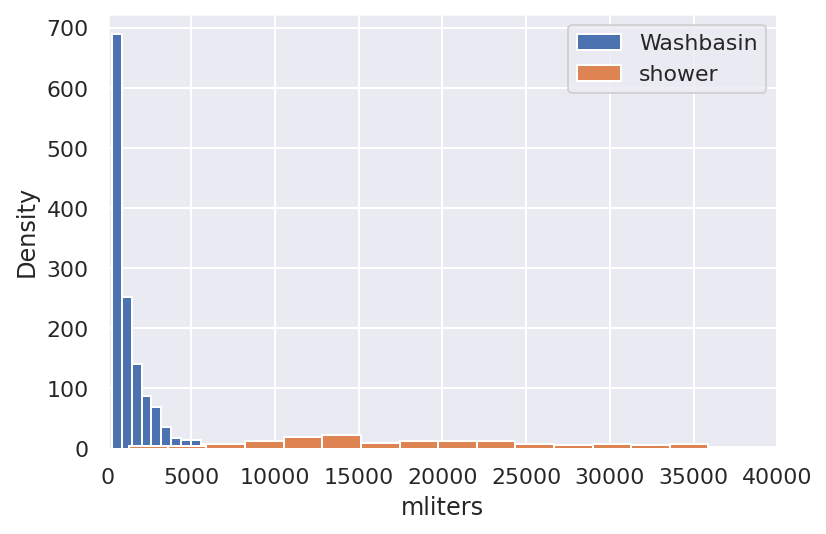

In [10]:
water_data = pd.read_csv("./data/dataset_parameters.csv", delimiter=" ")

water_data.loc[water_data["fixture"] == "washbasin", "liters"].hist(bins=40,
    label="Washbasin"
)
water_data.loc[water_data["fixture"] == "shower", "liters"].hist(bins=40,
    label="shower"
)


plt.xlim(0,40000)
plt.xlabel("mliters")
plt.ylabel("Density")
plt.legend();
plt.show()

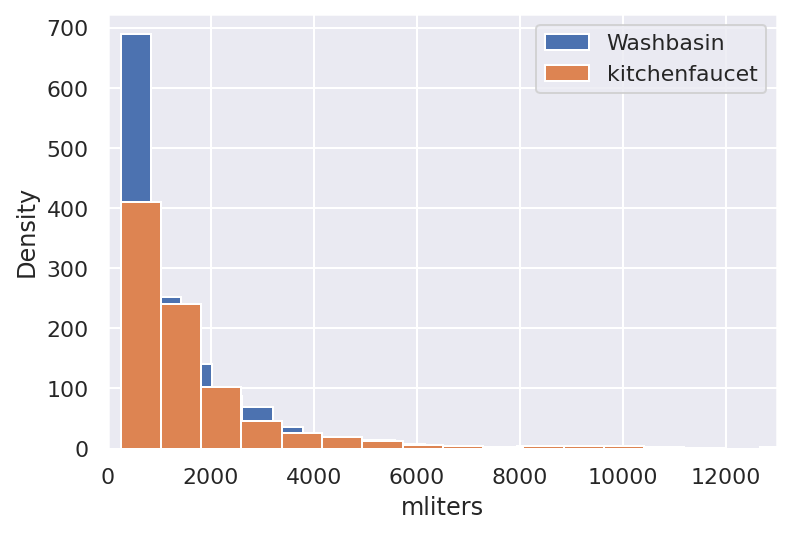

In [11]:
plt.figure()
water_data.loc[water_data["fixture"] == "washbasin", "liters"].hist(bins=40,
    label="Washbasin"
)
water_data.loc[water_data["fixture"] == "kitchenfaucet", "liters"].hist(bins=40,
    label="kitchenfaucet"
)


plt.xlim(0,13000)
plt.xlabel("mliters")
plt.ylabel("Density")
plt.legend();
plt.show()

In [12]:
def get_bootstrap_samples(data, n_samples):
    """Generate bootstrap samples using the bootstrap method."""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples


def stat_intervals(stat, alpha):
    """Produce an interval estimate."""
    boundaries = np.percentile(stat, [100 * alpha / 2.0, 100 * (1 - alpha / 2.0)])
    return boundaries


# Save the data about the washbasin and Kitchen faucet to split the dataset
wb_liters = water_data.loc[
    water_data["fixture"] == "washbasin", "liters"
].values
kit_liters = water_data.loc[
    water_data["fixture"] == "kitchenfaucet", "liters"
].values

show_liters = water_data.loc[
    water_data["fixture"] == "shower", "liters"
].values

# Set the seed for reproducibility of the results
np.random.seed(0)

# Generate the samples using bootstrapping and calculate the mean for each of them
wb_liters_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(wb_liters, 5000)
]
kit_liters_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(kit_liters, 5000)
]

show_liters_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(show_liters, 5000)
]

# Print the resulting interval estimates
print(
    "mliters consumed by washbasin: mean interval", stat_intervals(wb_liters_mean_scores, 0.05)
)
print(
    "mliters consumed by kitchenfaucet: mean interval", stat_intervals(kit_liters_mean_scores, 0.05)
)

print(
    "mliters consumed by shower: mean interval", stat_intervals(show_liters_mean_scores, 0.05)
)

mliters consumed by washbasin: mean interval [1343.74715657 1547.52730798]
mliters consumed by kitchenfaucet: mean interval [1644.55840782 1953.05427374]
mliters consumed by shower: mean interval [20094.71101695 24334.08135593]
